# Read Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import data from spreadsheet
sheet_url = 'https://docs.google.com/spreadsheets/d/1_7GIdWa-ddzseoCnEOEBtQ7wEe6GZ6MEy9LawylqbbE/edit#gid=1485085913'
sheet_url_tf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid')
print(sheet_url_tf)

df = pd.read_csv(sheet_url_tf)
df.head()

https://docs.google.com/spreadsheets/d/1_7GIdWa-ddzseoCnEOEBtQ7wEe6GZ6MEy9LawylqbbE/export?format=csv&gid1485085913


,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       177 non-null    object 
 1   Sales      177 non-null    float64
 2   Series     141 non-null    object 
 3   Release    177 non-null    object 
 4   Genre      177 non-null    object 
 5   Developer  177 non-null    object 
 6   Publisher  177 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.8+ KB


# Data Prep

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
172    False
173    False
174    False
175     True
176     True
Length: 177, dtype: bool

## Drop Duplicate Data

In [ ]:
df_drop_dup = df.drop_duplicates(keep='first')
df_drop_dup.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
170    False
171    False
172    False
173    False
174    False
Length: 175, dtype: bool

In [ ]:
df_drop_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       175 non-null    object 
 1   Sales      175 non-null    float64
 2   Series     139 non-null    object 
 3   Release    175 non-null    object 
 4   Genre      175 non-null    object 
 5   Developer  175 non-null    object 
 6   Publisher  175 non-null    object 
dtypes: float64(1), object(6)
memory usage: 10.9+ KB


## Fill Null/NaN Value

In [ ]:
df_drop_dup.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic


In [ ]:
df_filled = df_drop_dup.copy()

df_filled['Series'] = df_filled['Series'].fillna(df_filled['Name'])
df_filled.info()
df_filled.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       175 non-null    object 
 1   Sales      175 non-null    float64
 2   Series     175 non-null    object 
 3   Release    175 non-null    object 
 4   Genre      175 non-null    object 
 5   Developer  175 non-null    object 
 6   Publisher  175 non-null    object 
dtypes: float64(1), object(6)
memory usage: 10.9+ KB


,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,PlayerUnknown's Battlegrounds,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,Garry's Mod,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,Terraria,5/1/2011,Action-adventure,Re-Logic,Re-Logic


## Change Release Dtype

In [ ]:
df_prep = df_filled.copy()

df_prep['Release'] = pd.to_datetime(df_prep['Release'])
df_prep.info()
df_prep.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       175 non-null    object        
 1   Sales      175 non-null    float64       
 2   Series     175 non-null    object        
 3   Release    175 non-null    datetime64[ns]
 4   Genre      175 non-null    object        
 5   Developer  175 non-null    object        
 6   Publisher  175 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 10.9+ KB


,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,PlayerUnknown's Battlegrounds,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,Garry's Mod,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,Terraria,2011-05-01,Action-adventure,Re-Logic,Re-Logic


In [ ]:
# for download clean data, uncomment command below after running all of the commands above
'''
from google.colab import files

df_prep.to_csv('Game_sales.csv', index=False, header=True, encoding = 'utf-8-sig')
files.download('Game_sales.csv')
'''

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# EDA (Exploratory Data Analyst)

## The Oldest and The Newest Game

In [ ]:
sort_game_age = df_prep[['Name', 'Release']].sort_values(by='Release')
sort_game_age.reset_index(drop=True)

,Name,Release
0,Hydlide,1984-12-01
1,Where in the World Is Carmen Sandiego?,1985-06-01
2,International Karate,1985-11-01
3,Tetris,1988-01-01
4,Last Ninja 2,1988-08-01
...,...,...
170,Mordhau,2019-04-01
171,Fall Guys,2020-08-01
172,Crusader Kings III,2020-09-01
173,Cyberpunk 2077,2020-12-01


The oldest game is Hydlide which was released in 1984-12-01 and The newest game is Valheim which was released in 2021-02-01

## Publisher who publish most game

In [ ]:
agg_publisher = df_prep.groupby('Publisher', as_index=False)['Name'].count().sort_values(by='Name').tail(10)
agg_publisher

,Publisher,Name
91,Virgin Interactive,3
54,LucasArts,3
40,Gathering of Developers,4
16,Capcom,4
57,Microsoft,4
37,GT Interactive,5
2,Activision,6
62,Paradox Interactive,7
8,Blizzard Entertainment,8
28,Electronic Arts,19


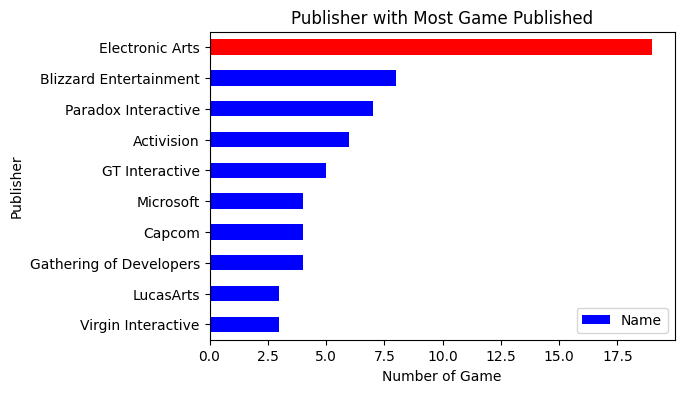

In [ ]:
plt.rcParams["figure.figsize"] = (6,4)
colors = ['#0000FF' for _ in range(len(agg_publisher))]
colors[-1] = '#FF0000'

agg_publisher.plot.barh(x = 'Publisher', y = 'Name', color=colors)
plt.title('Publisher with Most Game Published')
plt.xlabel('Number of Game')

plt.show()

based on the chart, publisher who publish most game is Electronic Arts with 19 games Published.

## Developer who develop most game

In [ ]:
agg_developer = df_prep.groupby('Developer', as_index=False)['Name'].count().sort_values(by='Name').tail(10)
agg_developer

,Developer,Name
94,System 3,3
12,CD Projekt Red,4
13,Capcom,4
32,Ensemble Studios,4
102,Valve,4
106,Westwood Studios,4
108,id Software,4
70,Paradox Development Studio,5
60,Maxis,6
6,Blizzard Entertainment,8


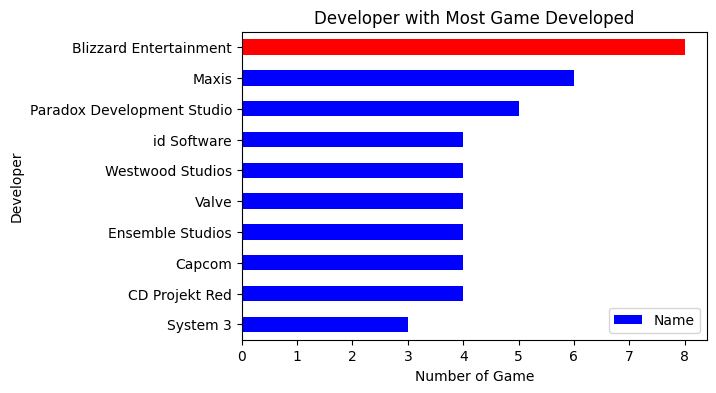

In [ ]:
plt.rcParams["figure.figsize"] = (6,4)
colors = ['#0000FF' for _ in range(len(agg_developer))]
colors[-1] = '#FF0000'

agg_developer.plot.barh(x = 'Developer', y = 'Name', color=colors)
plt.title('Developer with Most Game Developed')
plt.xlabel('Number of Game')

plt.show()

developer who develop most game is Blizzard Entertainment with 8 game developed

## Most Sales Series

In [ ]:
agg_seriesales = df_prep.groupby('Series', as_index=False).agg({'Sales' : 'sum', 'Name' : 'count'}).sort_values(by='Sales', ascending=False).head()
agg_seriesales

,Series,Sales,Name
76,PlayerUnknown's Battlegrounds,42.0,1
66,Minecraft,33.0,1
27,Diablo,26.0,3
108,The Sims,24.0,3
47,Half-Life,21.0,2


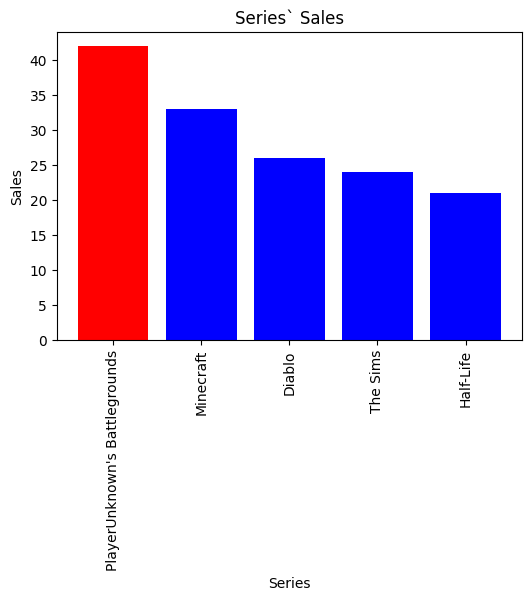

In [ ]:
plt.rcParams["figure.figsize"] = (6,4)
colors = ['#0000FF' for _ in range(len(agg_seriesales))]
colors[0] = '#FF0000'

plt.bar(agg_seriesales['Series'], agg_seriesales['Sales'], color=colors)
plt.title('Series` Sales')
plt.xlabel('Series')
plt.ylabel('Sales')
plt.xticks(rotation=90)

plt.show()

the most sold series is PlayerUnkown's Battlegrounds Series with over 40 sales.

## Series has The Most Game

In [ ]:
agg_series = df_prep.groupby('Series', as_index=False)['Name'].count().sort_values(by='Name', ascending=False).head()
agg_series

,Series,Name
15,Command & Conquer,5
2,Age of Empires,4
95,StarCraft,4
14,Civilization,4
24,Dark Souls,3


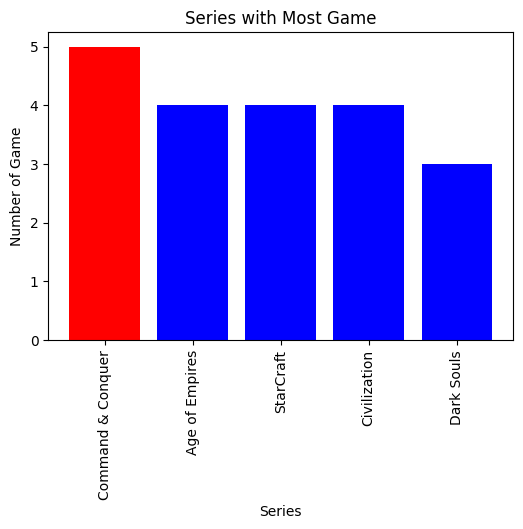

In [ ]:
plt.rcParams["figure.figsize"] = (6,4)
colors = ['#0000FF' for _ in range(len(agg_series))]
colors[0] = '#FF0000'

plt.bar(agg_series['Series'], agg_series['Name'], color=colors)
plt.title('Series with Most Game')
plt.xlabel('Series')
plt.ylabel('Number of Game')
plt.xticks(rotation=90)

plt.show()

series which has most game is Command & Conquer Series with 5 games in total